In [11]:
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('market_map.db')
c = conn.cursor()

# Drop tables if they exist
tables = ['companies', 'categories', 'subcategories', 'logos']
for table in tables:
    c.execute(f'DROP TABLE IF EXISTS {table}')
conn.commit()

# Create tables
c.execute('''
CREATE TABLE companies (
    id INTEGER PRIMARY KEY,
    name TEXT,
    category TEXT,
    subcategory TEXT,
    funding REAL,
    latest_funding_date TEXT,
    logo BLOB
)
''')

# Insert sample data
companies = [
    (1, 'Safire Technology', 'Energy', 'Battery Technology', 50.0, '2023-05-01', None),
    (2, 'BLIXT', 'Energy', 'Energy Storage', 30.0, '2023-06-15', None),
    # Add more companies as needed
]

c.executemany('INSERT INTO companies VALUES (?, ?, ?, ?, ?, ?, ?)', companies)
conn.commit()

In [12]:
# Create tables for categories and subcategories
c.execute('''
CREATE TABLE categories (
    id INTEGER PRIMARY KEY,
    name TEXT
)
''')

c.execute('''
CREATE TABLE subcategories (
    id INTEGER PRIMARY KEY,
    category_id INTEGER,
    name TEXT,
    FOREIGN KEY (category_id) REFERENCES categories (id)
)
''')

# Insert sample categories and subcategories
categories = [(1, 'Energy'), (2, 'Transportation')]
subcategories = [(1, 1, 'Battery Technology'), (2, 1, 'Energy Storage'), (3, 2, 'Electric Vehicles')]

c.executemany('INSERT INTO categories VALUES (?, ?)', categories)
c.executemany('INSERT INTO subcategories VALUES (?, ?, ?)', subcategories)
conn.commit()

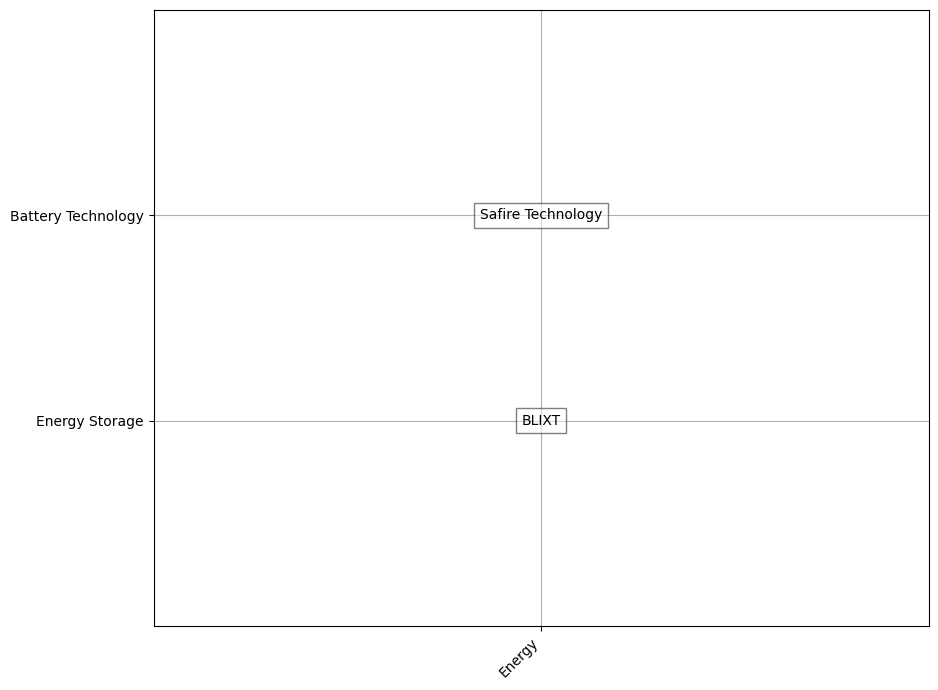

In [18]:
import matplotlib.pyplot as plt
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('market_map.db')
c = conn.cursor()

# Fetch data from the database
c.execute('SELECT name, category, subcategory FROM companies')
companies = c.fetchall()

# Create a figure
fig, ax = plt.subplots(figsize=(10, 8))

# Define unique positions for each category and subcategory
categories = list(set([company[1] for company in companies]))
subcategories = list(set([company[2] for company in companies]))

# Create a grid for positioning
category_positions = {category: i for i, category in enumerate(categories)}
subcategory_positions = {subcategory: i for i, subcategory in enumerate(subcategories)}

# Plot companies
for company in companies:
    name, category, subcategory = company
    x = category_positions[category]
    y = subcategory_positions[subcategory]
    ax.text(x, y, name, ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))

# Set limits and labels
ax.set_xlim(-1, len(categories))
ax.set_ylim(-1, len(subcategories))
ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.set_yticks(range(len(subcategories)))
ax.set_yticklabels(subcategories)

# Add grid lines for better visualization
ax.grid(True)

plt.show()

In [19]:
#shows the logo of the company
from PIL import Image, ImageDraw, ImageFont

# Load and resize company logos
def load_and_resize_logo(logo_path, size=(50, 50)):
    logo = Image.open(logo_path)
    logo.thumbnail(size)
    return logo

# Example usage
logo = load_and_resize_logo('datasets\\logos\\a16z.png')
logo.show()

In [20]:
# Save the figure
fig.savefig('market_map.png')

# Alternatively, save as PDF
fig.savefig('market_map.pdf')

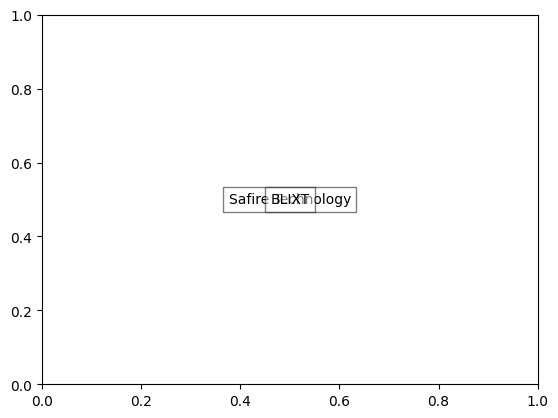

In [16]:
def create_market_map():
    # Fetch data
    c.execute('SELECT name, category, subcategory FROM companies')
    companies = c.fetchall()

    # Create figure
    fig, ax = plt.subplots()

    # Plot companies
    for company in companies:
        name, category, subcategory = company
        ax.text(0.5, 0.5, name, ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    # Save the figure
    fig.savefig('market_map.png')

create_market_map()

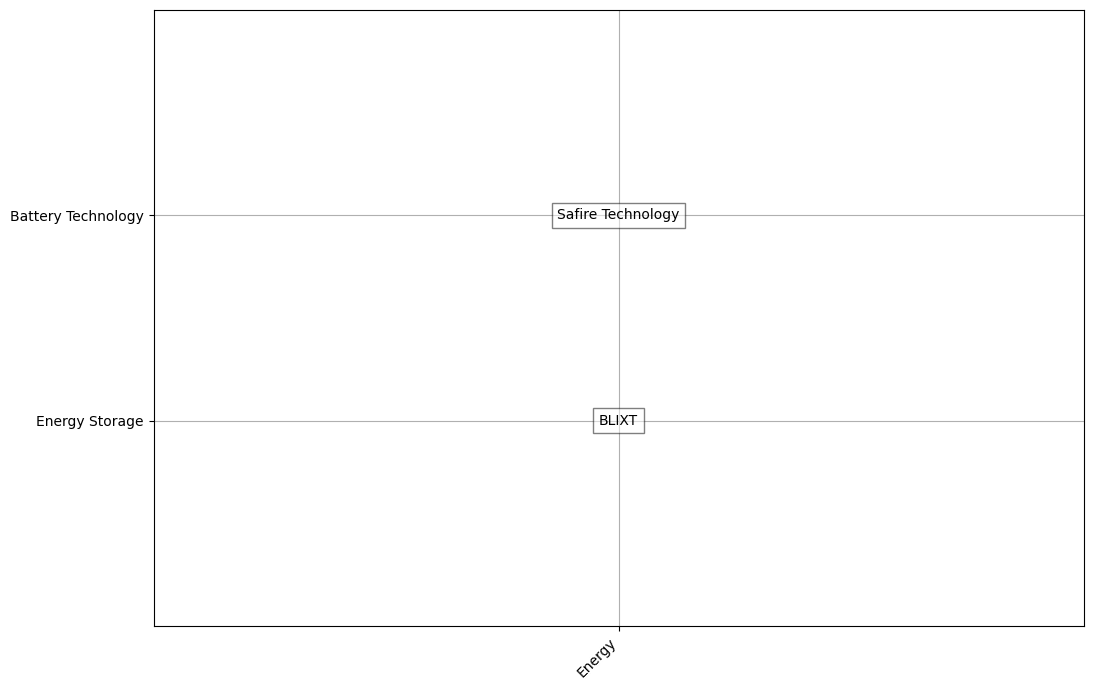

In [21]:
def create_market_map():
    # Connect to SQLite database
    conn = sqlite3.connect('market_map.db')
    c = conn.cursor()

    # Fetch data from the database
    c.execute('SELECT name, category, subcategory FROM companies')
    companies = c.fetchall()

    # Create a figure
    fig, ax = plt.subplots(figsize=(12, 8))

    # Define unique positions for each category and subcategory
    categories = list(set([company[1] for company in companies]))
    subcategories = list(set([company[2] for company in companies]))

    # Create a grid for positioning
    category_positions = {category: i for i, category in enumerate(categories)}
    subcategory_positions = {subcategory: i for i, subcategory in enumerate(subcategories)}

    # Plot companies
    for company in companies:
        name, category, subcategory = company
        x = category_positions[category]
        y = subcategory_positions[subcategory]
        ax.text(x, y, name, ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))

    # Set limits and labels
    ax.set_xlim(-1, len(categories))
    ax.set_ylim(-1, len(subcategories))
    ax.set_xticks(range(len(categories)))
    ax.set_xticklabels(categories, rotation=45, ha='right')
    ax.set_yticks(range(len(subcategories)))
    ax.set_yticklabels(subcategories)

    # Add grid lines for better visualization
    ax.grid(True)

    # Save the figure
    fig.savefig('market_map.png')

    # Show the plot
    plt.show()

# Call the function to create and display the market map
create_market_map()